In [1]:
import sys
import pathlib
sys.path.append(str(pathlib.PurePath(pathlib.Path.cwd().parent)))


import numpy as np
import matplotlib.pyplot as plt
from src import particle_funcs
from src.particle_funcs import distance_matrix
from src import leap_funcs
from src.leap_funcs import qubo
from src.leap_funcs.qubo import q_matrix

C:\Users\oahre\AppData\Local\Temp\ipykernel_23588\1983393585.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_initial.show()


[1. 0. 0. ... 0. 0. 1.]


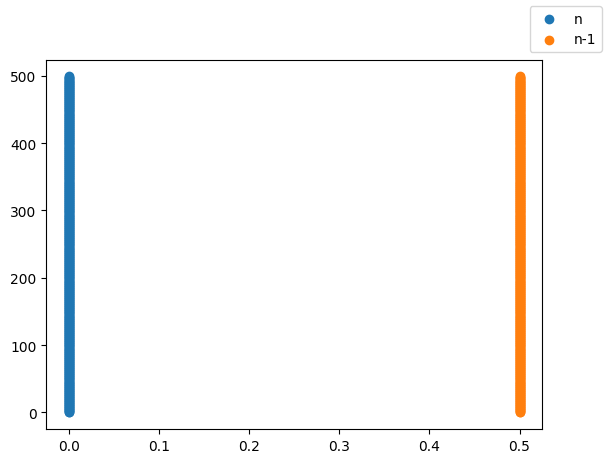

In [2]:
num_particles = 500
dist_particles = 0.5

part_coords_n = np.zeros((num_particles,2))
part_coords_nm1 = np.zeros((num_particles,2))

for i in range(np.shape(part_coords_n)[0]):
    part_coords_n[i,:] = [0, i]
    part_coords_nm1[i,:] = [dist_particles, i]

fig_initial, axs_initial = plt.subplots(1,1)
axs_initial.scatter(part_coords_n[:,0], part_coords_n[:,1], label="n")
axs_initial.scatter(part_coords_nm1[:,0], part_coords_nm1[:,1], label="n-1")
fig_initial.legend()
fig_initial.show()

correct_sol = np.zeros(num_particles*num_particles)
for i in range(1, num_particles+1):
    correct_sol[(i-1)*num_particles + i -1] = 1.

print(correct_sol)

In [3]:
dist = distance_matrix.calc_phi_ij(coords_n=part_coords_n, coords_n_minus_1=part_coords_nm1)
dist

array([[  0.5       ,   1.11803399,   2.06155281, ..., 497.00025151,
        498.000251  , 499.0002505 ],
       [  1.11803399,   0.5       ,   1.11803399, ..., 496.00025202,
        497.00025151, 498.000251  ],
       [  2.06155281,   1.11803399,   0.5       , ..., 495.00025253,
        496.00025202, 497.00025151],
       ...,
       [497.00025151, 496.00025202, 495.00025253, ...,   0.5       ,
          1.11803399,   2.06155281],
       [498.000251  , 497.00025151, 496.00025202, ...,   1.11803399,
          0.5       ,   1.11803399],
       [499.0002505 , 498.000251  , 497.00025151, ...,   2.06155281,
          1.11803399,   0.5       ]])

In [4]:
q1 = leap_funcs.qubo.q_matrix.q_dist(dist)
##with np.printoptions(precision=2):
##    print(q1)

MemoryError: Unable to allocate 7.28 TiB for an array with shape (1000000, 1000000) and data type float64

In [5]:
q2 = qubo.q_matrix.q_part(num_particles)
q3 = qubo.q_matrix.q_pos(num_particles)

In [10]:
Q = q1 + q2 + q3
print(np.sum(Q>0.01))

#with np.printoptions(precision=2, linewidth=200, suppress=True, threshold=10000):
print(Q)

972
[[-1.75        5.11803399  6.06155281 ...  0.          0.
   0.        ]
 [ 0.         -0.75        8.60977223 ...  0.          0.
   0.        ]
 [ 0.          0.          2.25       ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  2.25        8.60977223
   6.06155281]
 [ 0.          0.          0.         ...  0.         -0.75
   5.11803399]
 [ 0.          0.          0.         ...  0.          0.
  -1.75      ]]


In [7]:
#Q_dict = qubo.q_matrix.Q_convert_to_dict(Q)

In [5]:
q1 = leap_funcs.qubo.q_matrix.q_dist_diag_sparse(dist)
q2 = leap_funcs.qubo.q_matrix.q_pos_sparse(num_particles)
q3 = leap_funcs.qubo.q_matrix.q_part_sparse(num_particles)

q = q1 + q2 + q3
#q = q.eliminate_zeros()
print(q.count_nonzero())
#print(np.sum(q.toarray()>0.01))
#print(q.toarray())

125000000


In [ ]:
from dwave.samplers import SimulatedAnnealingSampler
import pandas as pd

In [ ]:
sampler = SimulatedAnnealingSampler()

In [ ]:
sample = sampler.sample_qubo(Q_dict)

In [ ]:
sample

In [ ]:
sample.record[0][0]

In [ ]:
sample_list = np.zeros(num_particles*num_particles)
print(sample.samples()[0])
for i, item in enumerate(sample.record[0][0]):
    sample_list[i] = item

print(sample_list)
print("Simulated Annealing is same as correct:")
print((correct_sol==sample_list).all())
for i in range(len(correct_sol)):
    if not correct_sol[i]==sample_list[i]:
        print(i)